<a href="https://colab.research.google.com/github/MuhammadZaky44/Tugas_Besar-Machine-Learning-Unsupervised-Learning/blob/main/Tugas_Pertama_Pembelajaran_Mesin_1301190445.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Besar Pembelajaran Mesin Tahap ke-1
## Nama: Muhammad Zaky Al Fatih - 1301190445
## Kelas: IF - 43 - 12

In [15]:
# Mengimport library yang akan diperlukan pada program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import random as rd
import seaborn as sns
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [16]:
# Import data frame train
df_train = pd.read_csv("https://raw.githubusercontent.com/MuhammadZaky44/MuhammadZaky44/main/kendaraan_train.csv")

#  Explorasi dan Persiapan Data




In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [18]:
df_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


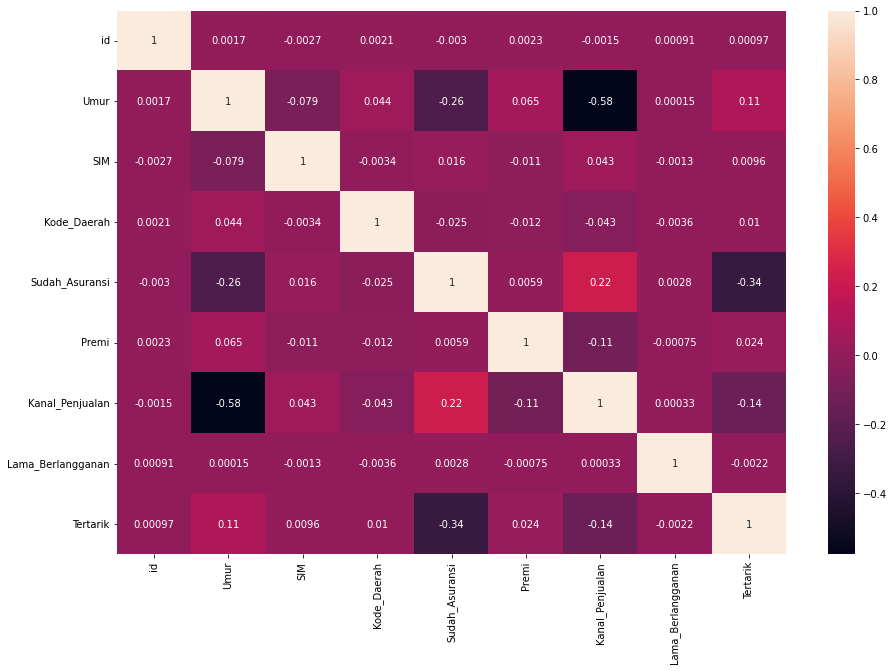

In [19]:
#Korelasi fitur
df_corr = df_train.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, ax=ax)

In [20]:
#Mengambil kolom kanal_Penjualan dan Umur
df = df_train.loc[:,["Kanal_Penjualan","Umur"]]
df.shape

(285831, 2)

## Mengolah data yang hilang

In [21]:
# Persentase data yang kosong
df.isna().mean().round(4) * 100

Kanal_Penjualan    5.00
Umur               4.97
dtype: float64

### Umur

In [22]:
# Mengganti missing values pada fitur umur menggunakan mean dari umur
# Sebelum
df["Umur"][:20]

0     30.0
1     48.0
2     21.0
3     58.0
4     50.0
5     21.0
6     33.0
7     23.0
8     20.0
9     54.0
10    25.0
11     NaN
12    21.0
13    21.0
14    66.0
15    31.0
16    24.0
17    22.0
18    24.0
19    52.0
Name: Umur, dtype: float64

In [23]:
# Sesudah
df["Umur"] = round(df["Umur"].replace(np.NaN, df["Umur"].mean()))
print(df["Umur"][:20])

0     30.0
1     48.0
2     21.0
3     58.0
4     50.0
5     21.0
6     33.0
7     23.0
8     20.0
9     54.0
10    25.0
11    39.0
12    21.0
13    21.0
14    66.0
15    31.0
16    24.0
17    22.0
18    24.0
19    52.0
Name: Umur, dtype: float64


### Kanal Penjualan

In [24]:
# Mengganti missing values pada kolom Kanal_Penjualan menggunakan mean dari Kanal_Penjualan
# Sebelum
df["Kanal_Penjualan"][:30]

0     152.0
1      29.0
2     160.0
3     124.0
4      88.0
5     152.0
6     124.0
7     152.0
8     160.0
9     124.0
10    152.0
11    152.0
12    160.0
13    152.0
14    145.0
15    152.0
16    152.0
17    152.0
18    152.0
19    124.0
20    152.0
21     31.0
22      NaN
23      NaN
24    124.0
25    152.0
26     26.0
27    152.0
28    152.0
29    124.0
Name: Kanal_Penjualan, dtype: float64

In [25]:
# Sesudah
df["Kanal_Penjualan"] = round(df["Kanal_Penjualan"].replace(np.NaN, df["Kanal_Penjualan"].mean()))
print(df["Kanal_Penjualan"][:30])

0     152.0
1      29.0
2     160.0
3     124.0
4      88.0
5     152.0
6     124.0
7     152.0
8     160.0
9     124.0
10    152.0
11    152.0
12    160.0
13    152.0
14    145.0
15    152.0
16    152.0
17    152.0
18    152.0
19    124.0
20    152.0
21     31.0
22    112.0
23    112.0
24    124.0
25    152.0
26     26.0
27    152.0
28    152.0
29    124.0
Name: Kanal_Penjualan, dtype: float64


# Menghandle Outliers Menggunakan Z-Score

In [26]:
# Z-Score
z = np.abs(stats.zscore(df))
print(z)

[[0.75676924 0.58500526]
 [1.57148868 0.60455678]
 [0.90820065 1.17978629]
 ...
 [0.75676924 1.04761273]
 [0.22675931 1.92629239]
 [1.62827546 0.40629644]]


In [27]:
# Menentukan nilai threshold untuk Z-Score yaitu 3 
print(np.where(z > 3))

(array([ 30910,  34745,  50340,  61568,  63378, 126839, 227529, 283908]), array([1, 1, 1, 1, 1, 1, 1, 1]))


In [28]:
# Mengeluarkan nilai z score dari salah satu data
print(z[30910][1])

3.0497676585495213


In [29]:
# Menyisirkan data dari outliers, dan dimasukkan kedalam clean_df
clean_df = df[(z < 3).all(axis=1)]

In [30]:
clean_df.shape

(285823, 2)

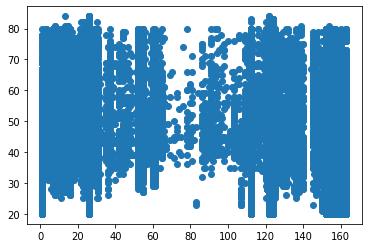

In [31]:
#Scatter plot dari data explorasi
df_Umur = clean_df.Umur.tolist()
df_kanalpenjualan = clean_df.Kanal_Penjualan.tolist()

list_cluster = []
for i in range(len(df_Umur)):
  list_cluster.append([df_kanalpenjualan[i], df_Umur[i]])

list_cluster = np.array(list_cluster)
plt.scatter(list_cluster[:,0], list_cluster[:,1], cmap='viridis')

In [32]:
# Menormalisasi data sebelum masuk ke main program
clean_df = (clean_df-clean_df.mean())/clean_df.std()

# Main Program

## Processing Data Menggunakan K-Means Algorithm

### Pembuatan Fungsi Yang Akan di Pakai

In [33]:
# Menghitung jumlah centroid berdasarkan scatter plot
def centroids_count(K, cluster, centroid):
  for i in range(K):
    centroid[i] = np.mean(cluster[i], axis=0)
  return centroid



############################################################################################
# Menghitung jumlah cluster dari scatter plot
def clusters_count(K, dataframe, centroid):
  # Membuat list cluster kosong yang akan diisi sebanyak k kali
  cluster = {}
  for x in range(K):
    cluster[x] = []
  
  for data in dataframe:
    # Menghitung jarak dari setiap data dari centroids menggunakan euclidean distance
    # Hasil dari perhitungan jarak tersebut akan disimpan ke dalam array eucli_dist
    eucli_dist = []
    for y in range(K):
      eucli_dist.append(np.linalg.norm(data - centroid[y]))       # Memanggil euclidean distance menggunakan np.linalg.norm
    cluster[eucli_dist.index(min(eucli_dist))].append(data)      # Hasil jarak euclidean akan disimpan kedalam cluster, yang memiliki centroid terdekat
  return cluster 


#################################################################################################
def kmeans(data, k, centroid={}, max_iter=12):
  # Inisialisasi centroids sebanyak k, dalam kasus ini jumlah centroid adalah 4
  for i in range(k):
    centroid[i] = data[i]

  # Melakukan pengulangan dimana akan menghitung cluster dan centroid sebanyak max_iter kali
  for i in range(max_iter):
    cluster = clusters_count(k, data, centroid)          
    centroid = centroids_count(k, cluster, centroid)

  # Menampilkan semua lokasi centroid
  for i in range(k):
    print(f'Centroid {i+1} :', centroid[i])

  return cluster, centroid


##################################################################################################
def clustering(cluster):
# Definisi untuk array dari data cluster
  df_dump = []

# Melakukan looping sebanyak key dari data
  for key in cluster.keys():                
    for x in cluster.get(key):    
      # Hasil dari proses tersebut akan disimpan kedalam array df       
      df_dump.append((x[0], x[1], key))

# Set array df menjadi dataframe dan menamakan kolomnya menjadi fitur yang dipakai
  df = pd.DataFrame(df_dump)
  df.columns = ['Kanal_Penjualan', 'Umur', 'Cluster']
# Memperlihatkan hasilnya dengan mengsample kan 10 data
  return df


####################################################################################################
def cluster_plot(k, df, centroid):
  # Menentukan warna untuk setiap cluster
  colors = ['#873e23','#eab676','#2596be', '#76b5c5', 'abdbe3']

  # Set ukuran dan nama dari plot
  plt.figure(figsize=(10, 10))
  plt.title('Data Clustering Result')

  # Perulangan untuk setiap data dan centroid
  for i in range(k):
    plt.scatter(
        df['Kanal_Penjualan'][df['Cluster'] == i], 
        df['Umur'][df['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )

    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')

  # Dasar penampilan label centroid
  plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')

  # Menampilkan nama label dari plot di tempat legend yang akan ditampilkan
  plt.xlabel("Kanal Penjualan")
  plt.ylabel("Umur")
  plt.legend(loc='best', bbox_to_anchor=(1.25, 0.75))
  plt.show()

## Implementasi fungsi yang sudah dibuat

In [34]:
data = clean_df.to_numpy() # Merubah dataframe menjadi numpy array
cluster, centroid = kmeans(data, 4) # Membutuhkan waktu sekitar 120 detik

Centroid 1 : [0.38166132 0.18173016]
Centroid 2 : [-1.6409327   0.76682693]
Centroid 3 : [ 0.72367572 -0.92351458]
Centroid 4 : [0.28989593 1.55521209]


In [35]:
df = clustering(cluster)
df.sample(10)

,Kanal_Penjualan,Umur,Cluster
233760,0.226740,-1.179836,2
185685,0.756752,-0.783270,2
248194,0.756752,-1.113742,2
18814,0.226740,-0.056232,0
207517,0.756752,-0.915459,2
228730,0.756752,-0.981553,2
111666,-1.628300,0.406428,1
128705,-1.628300,0.604711,1
108218,-1.628300,1.199560,1
38364,0.226740,0.604711,0


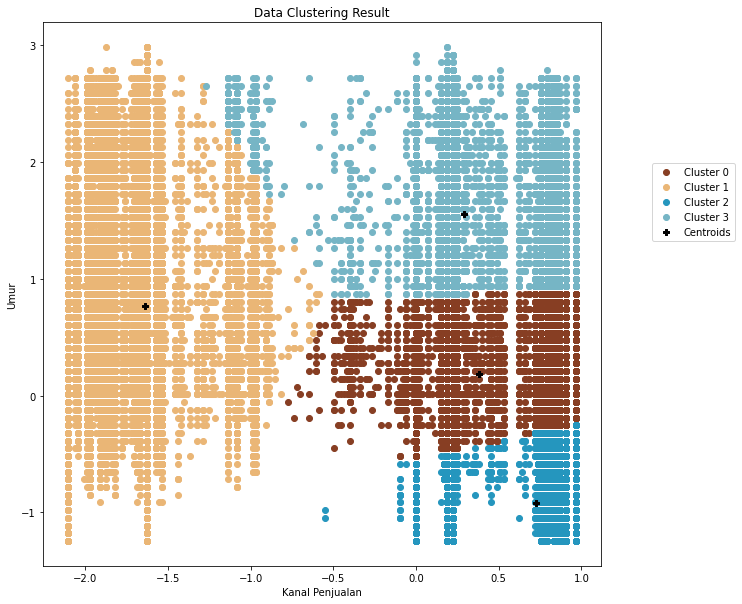

In [36]:
cluster_plot(4, df, centroid)

# Evaluation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


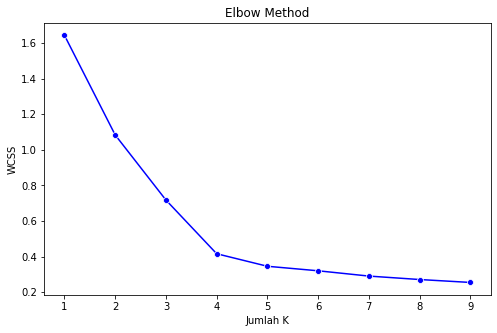

In [37]:
# Inisialisasi array wcss
wcss = []

# Perulangan sebanyak range 
for i in range(1, 10):
    # Membuat fit dari dataset menggunakan library KMeans
    model = KMeans(n_clusters = i).fit(df)
    model.fit(df)

    # Hasil dari cdist data dan center cluster akan dimaskkan kedalam array wcss
    wcss.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Membuat plot data elbow
plt.figure(figsize=(8, 5))
sns.lineplot(range(1, 10), wcss ,color='blue', marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah K')
plt.ylabel('WCSS')
plt.show()

# Eksperimen

In [38]:
# Mendefinisikan cluster dan centroid baru dengan menggunakan jumlah k=2
cluster1, centroid1 = kmeans(data, 2)

Centroid 1 : [ 0.61169127 -0.5184918 ]
Centroid 2 : [-1.14959088  0.97443511]


In [39]:
# Melakukan clustering pada setiap data, kemudian dimasukkan kedalam df1 sebagai data frame
df1 = clustering(cluster1)
df1.sample(10)

,Kanal_Penjualan,Umur,Cluster
216347,-0.000408,1.331749,1
95806,0.226740,-1.047647,0
48702,0.908184,-1.245930,0
261714,-1.628300,-1.113742,1
271789,-1.079360,1.530032,1
39801,-0.000408,0.274240,0
48634,0.756752,-1.113742,0
46926,-0.076123,0.009862,0
202484,0.226740,1.199560,1
182096,0.756752,-0.981553,0


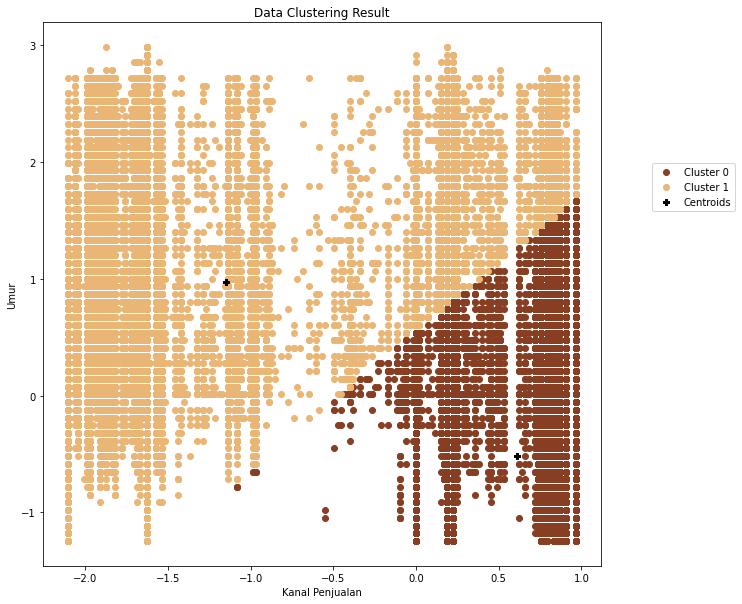

In [40]:
# Mengeluarkan hasil clustering dari data dalam bentuk scatter plot
cluster_plot(2, df1, centroid1)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


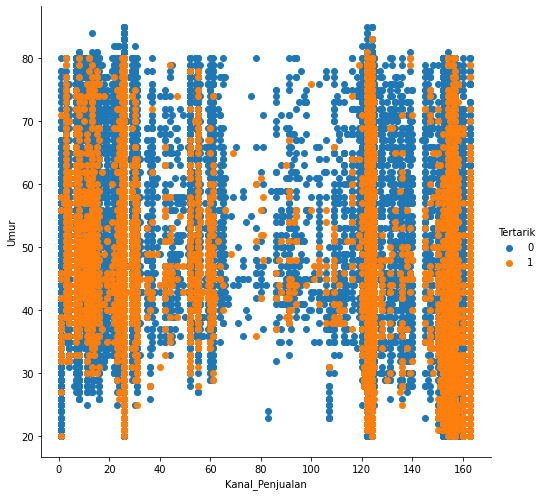

In [41]:
# Mengeluarkan hasil data yang akan menunjukkan nilai ketertarikan dari costumer
df_eksperimen = df_train[["Umur", "Kanal_Penjualan", "Tertarik"]]
sns.FacetGrid(df_eksperimen, hue="Tertarik", size=7).map(plt.scatter, "Kanal_Penjualan", "Umur").add_legend()